In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download kiattisak/student-performance-in-mathematics
!unzip student-performance-in-mathematics.zip

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/kiattisak/student-performance-in-mathematics
Archive:  student-performance-in-mathematics.zip
  inflating: exams.csv               


In [ ]:
#!/bin/bash
!kaggle datasets download rkiattisak/student-performance-in-mathematics

Dataset URL: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics
License(s): other


In [ ]:
import pandas as pd

df = pd.read_csv("exams.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


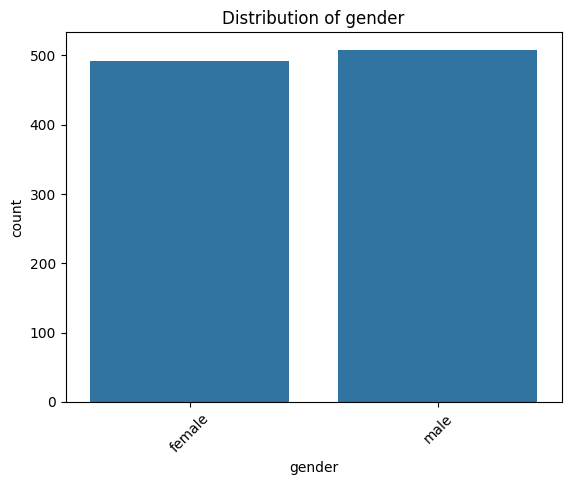

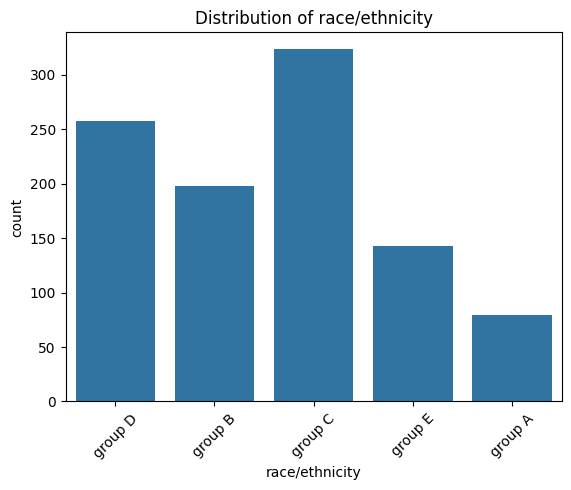

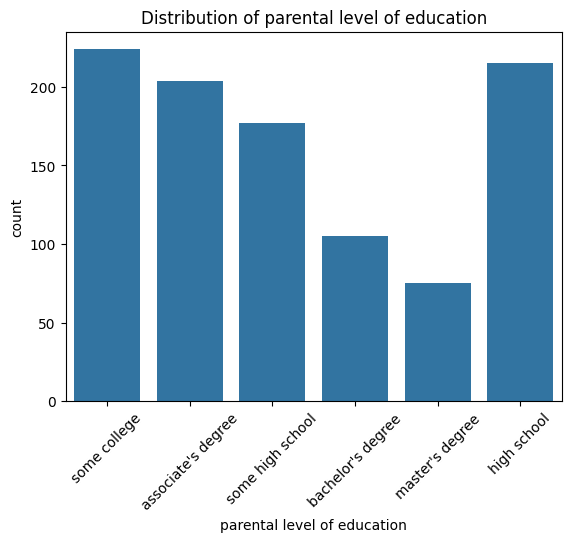

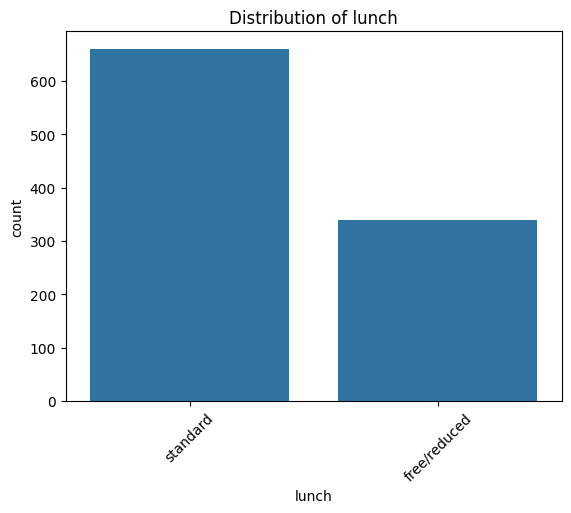

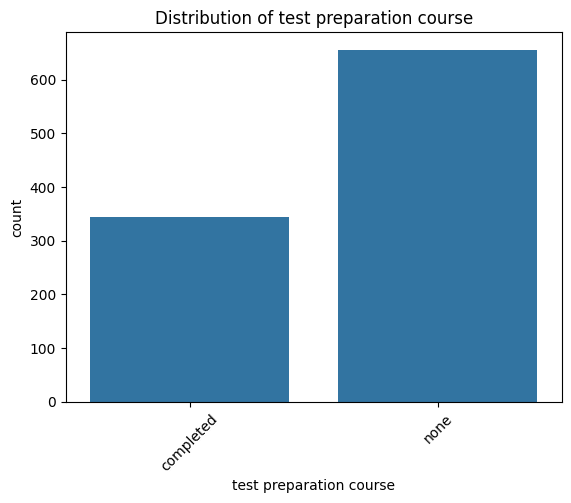

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for feature in categorical_features:
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
    plt.show()

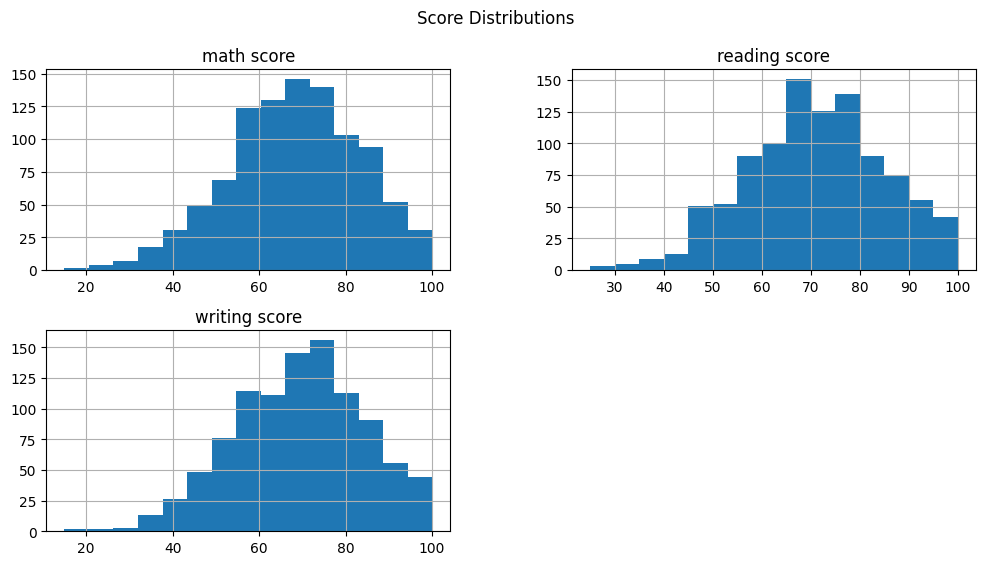

In [ ]:
numerical_features = ['math score', 'reading score', 'writing score']
df[numerical_features].hist(figsize=(12, 6), bins=15)
plt.suptitle('Score Distributions')
plt.show()

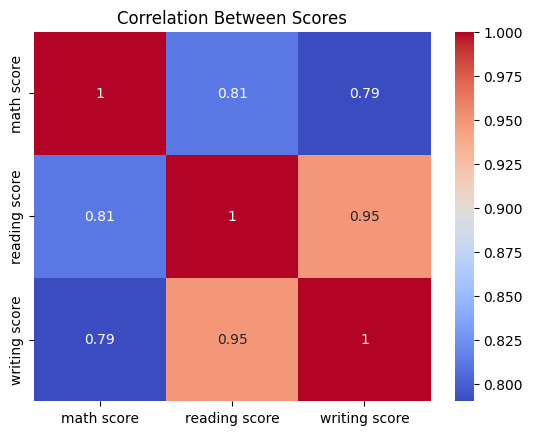

In [ ]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Between Scores')
plt.show()

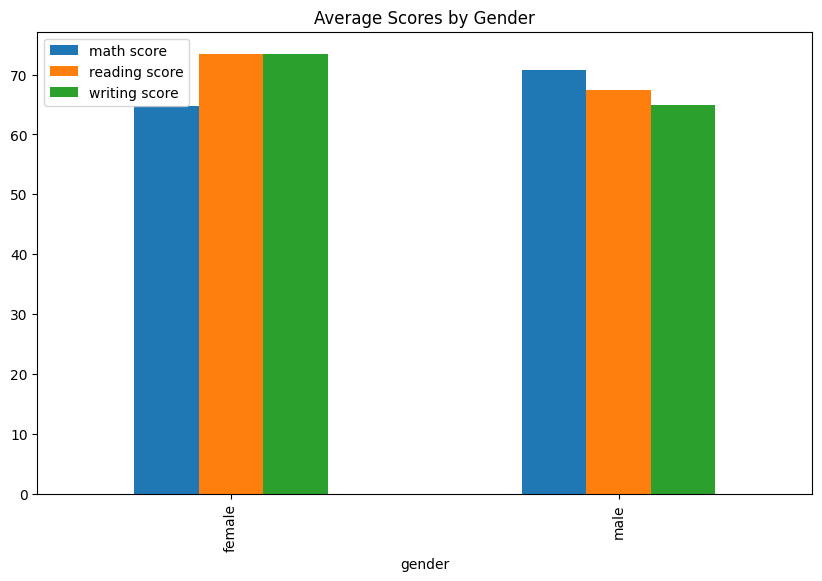

In [ ]:
df.groupby('gender')[numerical_features].mean().plot(kind='bar', figsize=(10, 6), title='Average Scores by Gender')
plt.show()

<ipython-input-16-22cfefdc393b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


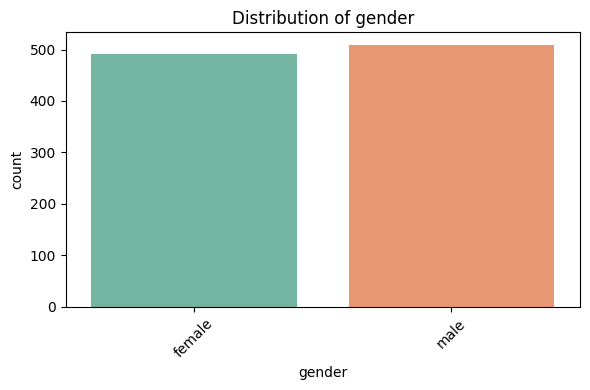

<ipython-input-16-22cfefdc393b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


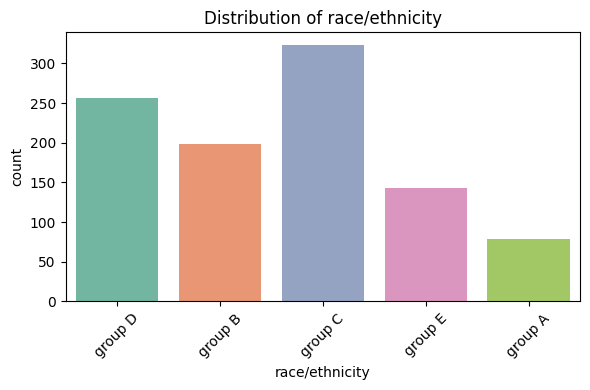

<ipython-input-16-22cfefdc393b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


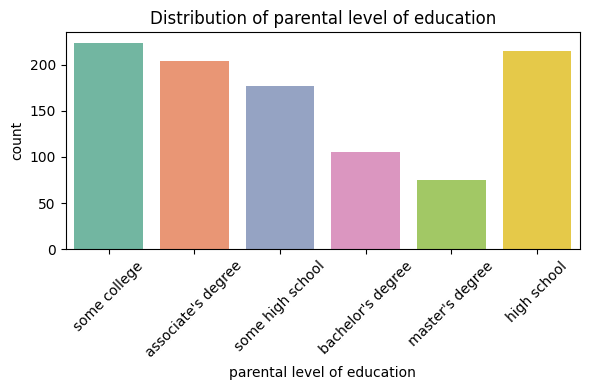

<ipython-input-16-22cfefdc393b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


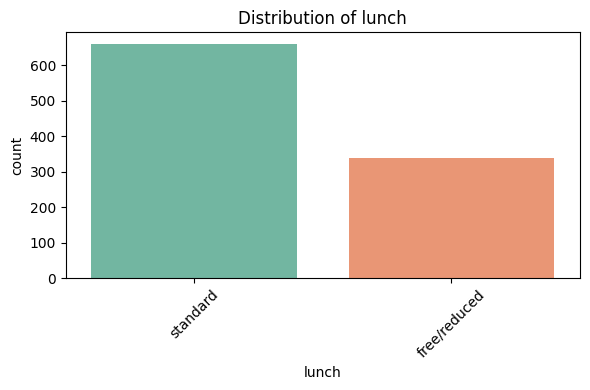

<ipython-input-16-22cfefdc393b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


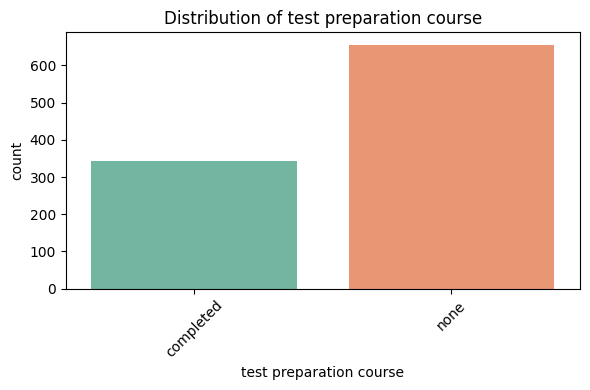

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

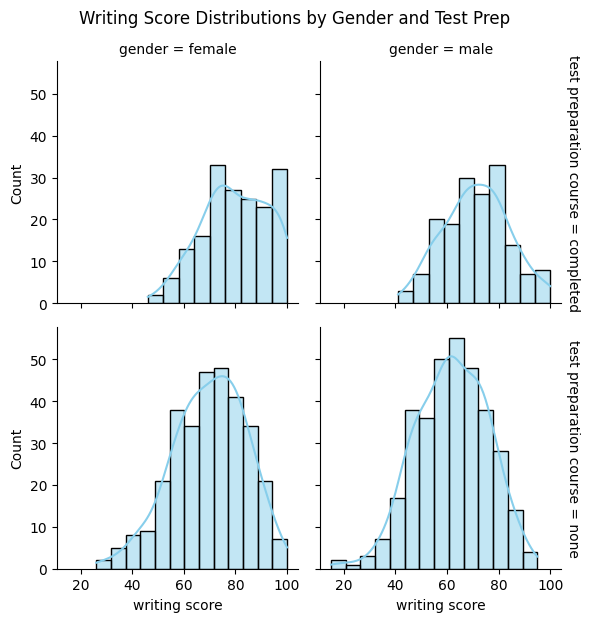

In [ ]:
g = sns.FacetGrid(df, col='gender', row='test preparation course', margin_titles=True)
g.map(sns.histplot, 'writing score', kde=True, color='skyblue')
plt.suptitle('Writing Score Distributions by Gender and Test Prep', y=1.03)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


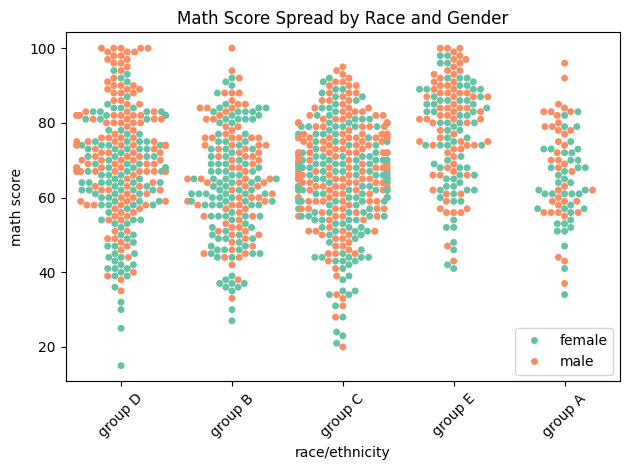

In [ ]:
sns.swarmplot(data=df, x='race/ethnicity', y='math score', hue='gender', palette='Set2')
plt.title('Math Score Spread by Race and Gender')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['average_score'] = df[numerical_features].mean(axis=1)

df['performance_level'] = pd.cut(df['average_score'], bins=[0, 60, 80, 100], labels=['low', 'medium', 'high'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in categorical_features + ['performance_level']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [ ]:
df['student_profile'] = df.apply(lambda row: f"{row['gender']} student from {row['race/ethnicity']} with {row['parental level of education']} education, {row['lunch']} lunch, and {'completed' if row['test preparation course'] == 'completed' else 'no'} test prep", axis=1)

In [ ]:
# Required Libraries
import torch
import torch.nn as nn
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tqdm import tqdm

# Prepare Labels and Splits
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['performance_level'] = pd.cut(df['average_score'], bins=[0, 60, 80, 100], labels=['low', 'medium', 'high'])
le = LabelEncoder()
df['performance_label'] = le.fit_transform(df['performance_level'])

# Train/Test Split
X_text = df['student_profile']
X_seq = df[['math score', 'reading score', 'writing score']].values
X_tabular = df[['math score', 'reading score', 'writing score']]
y = df['performance_label']

X_text_train, X_text_test, X_seq_train, X_seq_test, X_tab_train, X_tab_test, y_train, y_test = train_test_split(
    X_text, X_seq, X_tabular, y, test_size=0.2, random_state=42
)

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

class StudentTextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, return_tensors='pt')
        self.labels = torch.tensor(labels.values)

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}, self.labels[idx]

    def __len__(self):
        return len(self.labels)

train_text_ds = StudentTextDataset(X_text_train, y_train)
test_text_ds = StudentTextDataset(X_text_test, y_test)

train_text_dl = DataLoader(train_text_ds, batch_size=16, shuffle=True)
test_text_dl = DataLoader(test_text_ds, batch_size=16)

class DistilBERTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.classifier = nn.Linear(self.bert.config.hidden_size, 3)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0]
        return self.classifier(cls_output)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_bert = DistilBERTClassifier().to(device)

optimizer = torch.optim.AdamW(model_bert.parameters(), lr=5e-5)
loss_fn = nn.CrossEntropyLoss()

# Training Loop
model_bert.train()
for epoch in range(2):
    loop = tqdm(train_text_dl, leave=True)
    for batch, labels in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model_bert(input_ids, attention_mask)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

# Predictions
model_bert.eval()
probs_bert = []
with torch.no_grad():
    for batch, _ in test_text_dl:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model_bert(input_ids, attention_mask)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        probs_bert.extend(probs)
probs_bert = np.array(probs_bert)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


In [ ]:
class LSTMSimpleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=16, batch_first=True)
        self.fc = nn.Linear(16, 3)

    def forward(self, x):
        x, _ = self.lstm(x)
        out = self.fc(x[:, -1, :])
        return out

# Prepare sequence data
X_seq_train_tensor = torch.tensor(X_seq_train, dtype=torch.float32).unsqueeze(-1)
X_seq_test_tensor = torch.tensor(X_seq_test, dtype=torch.float32).unsqueeze(-1)
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)

train_seq_ds = torch.utils.data.TensorDataset(X_seq_train_tensor, y_train_tensor)
test_seq_ds = torch.utils.data.TensorDataset(X_seq_test_tensor, y_test_tensor)

train_seq_dl = DataLoader(train_seq_ds, batch_size=16, shuffle=True)
test_seq_dl = DataLoader(test_seq_ds, batch_size=16)

model_lstm = LSTMSimpleClassifier().to(device)
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# Train LSTM
model_lstm.train()
for epoch in range(10):
    for xb, yb in train_seq_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model_lstm(xb)
        loss = loss_fn(out, yb)
        loss.backward()
        optimizer.step()

# Predict with LSTM
model_lstm.eval()
probs_lstm = []
with torch.no_grad():
    for xb, _ in test_seq_dl:
        xb = xb.to(device)
        out = model_lstm(xb)
        probs = torch.softmax(out, dim=1).cpu().numpy()
        probs_lstm.extend(probs)
probs_lstm = np.array(probs_lstm)


In [ ]:
model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree.fit(X_tab_train, y_train)
probs_tree = model_tree.predict_proba(X_tab_test)


In [ ]:
# Average class probabilities from all models
ensemble_probs = (probs_bert + probs_lstm + probs_tree) / 3
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Final Evaluation
print("Classification Report (Soft Voting Ensemble):")
print(classification_report(y_test, ensemble_preds, target_names=le.classes_))

Classification Report (Soft Voting Ensemble):
              precision    recall  f1-score   support

        high       0.88      0.88      0.88        43
         low       0.95      0.93      0.94        40
      medium       0.93      0.94      0.94       117

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



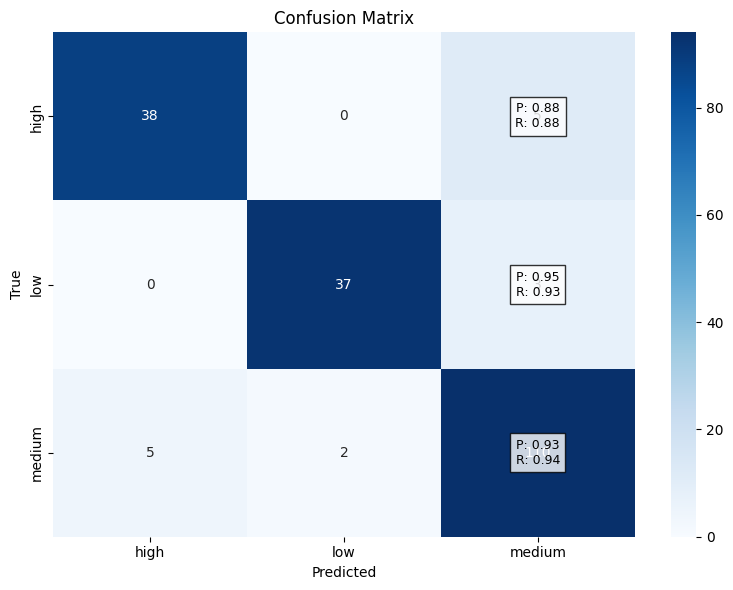

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, ensemble_preds)
precision = precision_score(y_test, ensemble_preds, average=None)
recall = recall_score(y_test, ensemble_preds, average=None)

labels = le.classes_
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=cm, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Annotate precision/recall
for i in range(len(labels)):
    plt.text(len(labels)-0.5, i + 0.5, f"P: {precision[i]:.2f}\nR: {recall[i]:.2f}",
             va='center', ha='center', color='black', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()


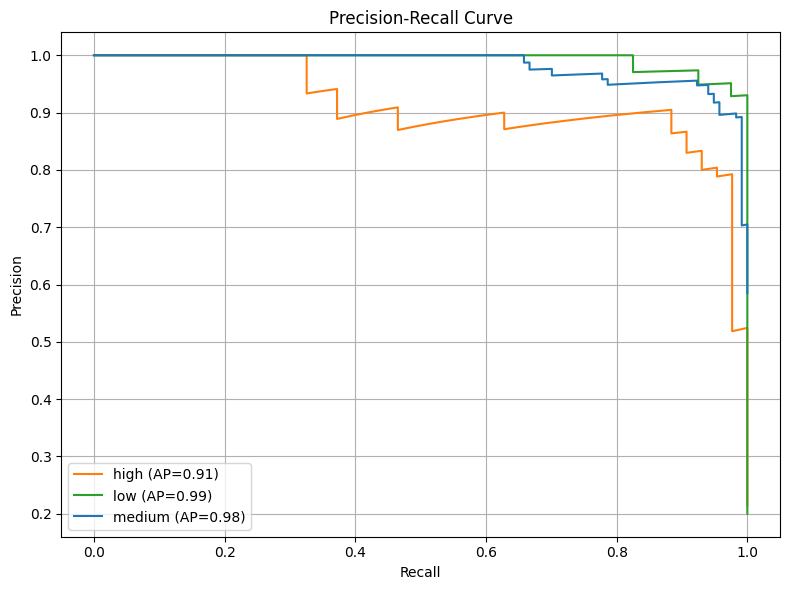

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']
for i, class_name in enumerate(le.classes_):
    precision, recall, _ = precision_recall_curve(y_test == i, ensemble_probs[:, i])
    ap = average_precision_score(y_test == i, ensemble_probs[:, i])
    plt.plot(recall, precision, label=f"{class_name} (AP={ap:.2f})", color=colors[i])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



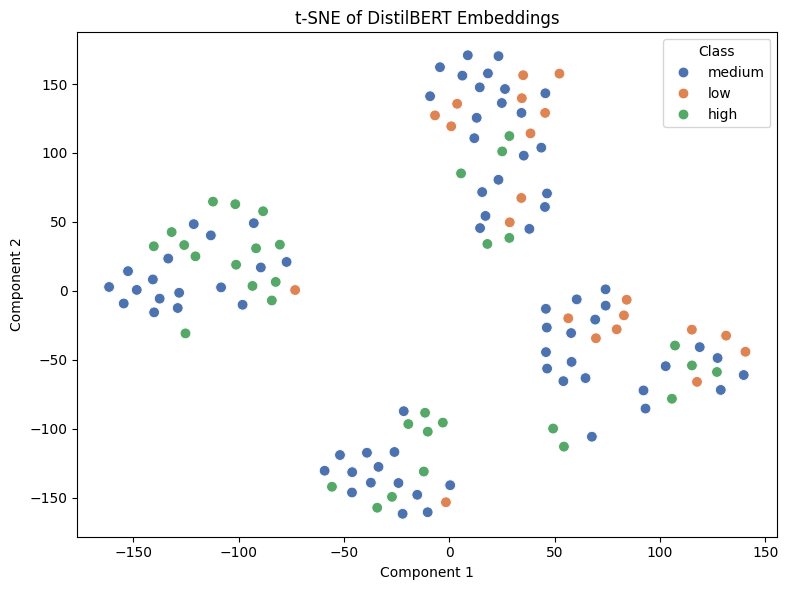

In [ ]:
from sklearn.manifold import TSNE

# Get BERT embeddings
bert_embeddings = []
model_bert.eval()
with torch.no_grad():
    for batch, _ in test_text_dl:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model_bert.bert(input_ids, attention_mask).last_hidden_state[:, 0]
        bert_embeddings.append(outputs.cpu().numpy())
bert_embeddings = np.vstack(bert_embeddings)

# Reduce with t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(bert_embeddings)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=le.inverse_transform(y_test), palette='deep', s=60)
plt.title("t-SNE of DistilBERT Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title='Class')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


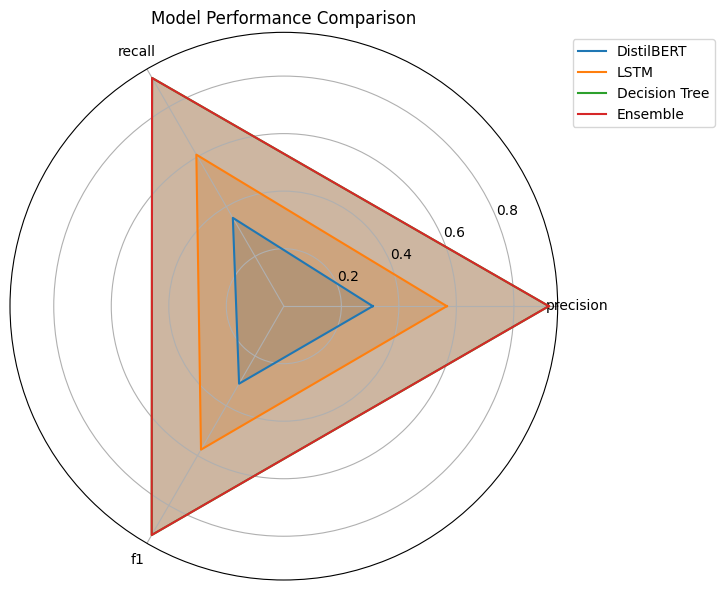

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Metrics for each model
def get_metrics(y_true, y_pred, name):
    return {
        "name": name,
        "precision": precision_score(y_true, y_pred, average='macro'),
        "recall": recall_score(y_true, y_pred, average='macro'),
        "f1": f1_score(y_true, y_pred, average='macro')
    }

metrics = [
    get_metrics(y_test, np.argmax(probs_bert, axis=1), "DistilBERT"),
    get_metrics(y_test, np.argmax(probs_lstm, axis=1), "LSTM"),
    get_metrics(y_test, np.argmax(probs_tree, axis=1), "Decision Tree"),
    get_metrics(y_test, ensemble_preds, "Ensemble"),
]

labels = ['precision', 'recall', 'f1']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close loop

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
for m in metrics:
    values = [m[l] for l in labels]
    values += values[:1]
    ax.plot(angles, values, label=m['name'])
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Model Performance Comparison")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()
